In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving Stock_Data.csv to Stock_Data (1).csv


# Nomor **1**

In [ ]:
data = pd.read_csv('Stock_Data.csv')
data.head()

,Stock Name,Symbol,Shares,Purchase Price,Cost Basis,Current Price,Market Value,Gain/Loss,Dividend/share,Annual Yield
0,Apple,AAPL,100,$90.00,"$9,000.00",$144.13,"$14,413.27","$14,269.14",$2.28,1.58%
1,Microsoft,MSFT,200,$32.00,"$6,400.00",$65.57,"$13,114.14","$13,048.57",$1.56,2.38%
2,Salesforce,CRM,150,$25.00,"$3,750.00",$82.57,"$12,385.50","$12,302.93",$0.00,0.00%
3,Oracle,ORCL,250,$50.00,"$12,500.00",$44.56,"$11,138.75","$11,094.20",$0.64,1.44%
4,Hewlett Packard Enterprise,HPE,500,$18.00,"$9,000.00",$17.69,"$8,842.50","$8,824.82",$0.26,1.47%


# Nomor **2A**

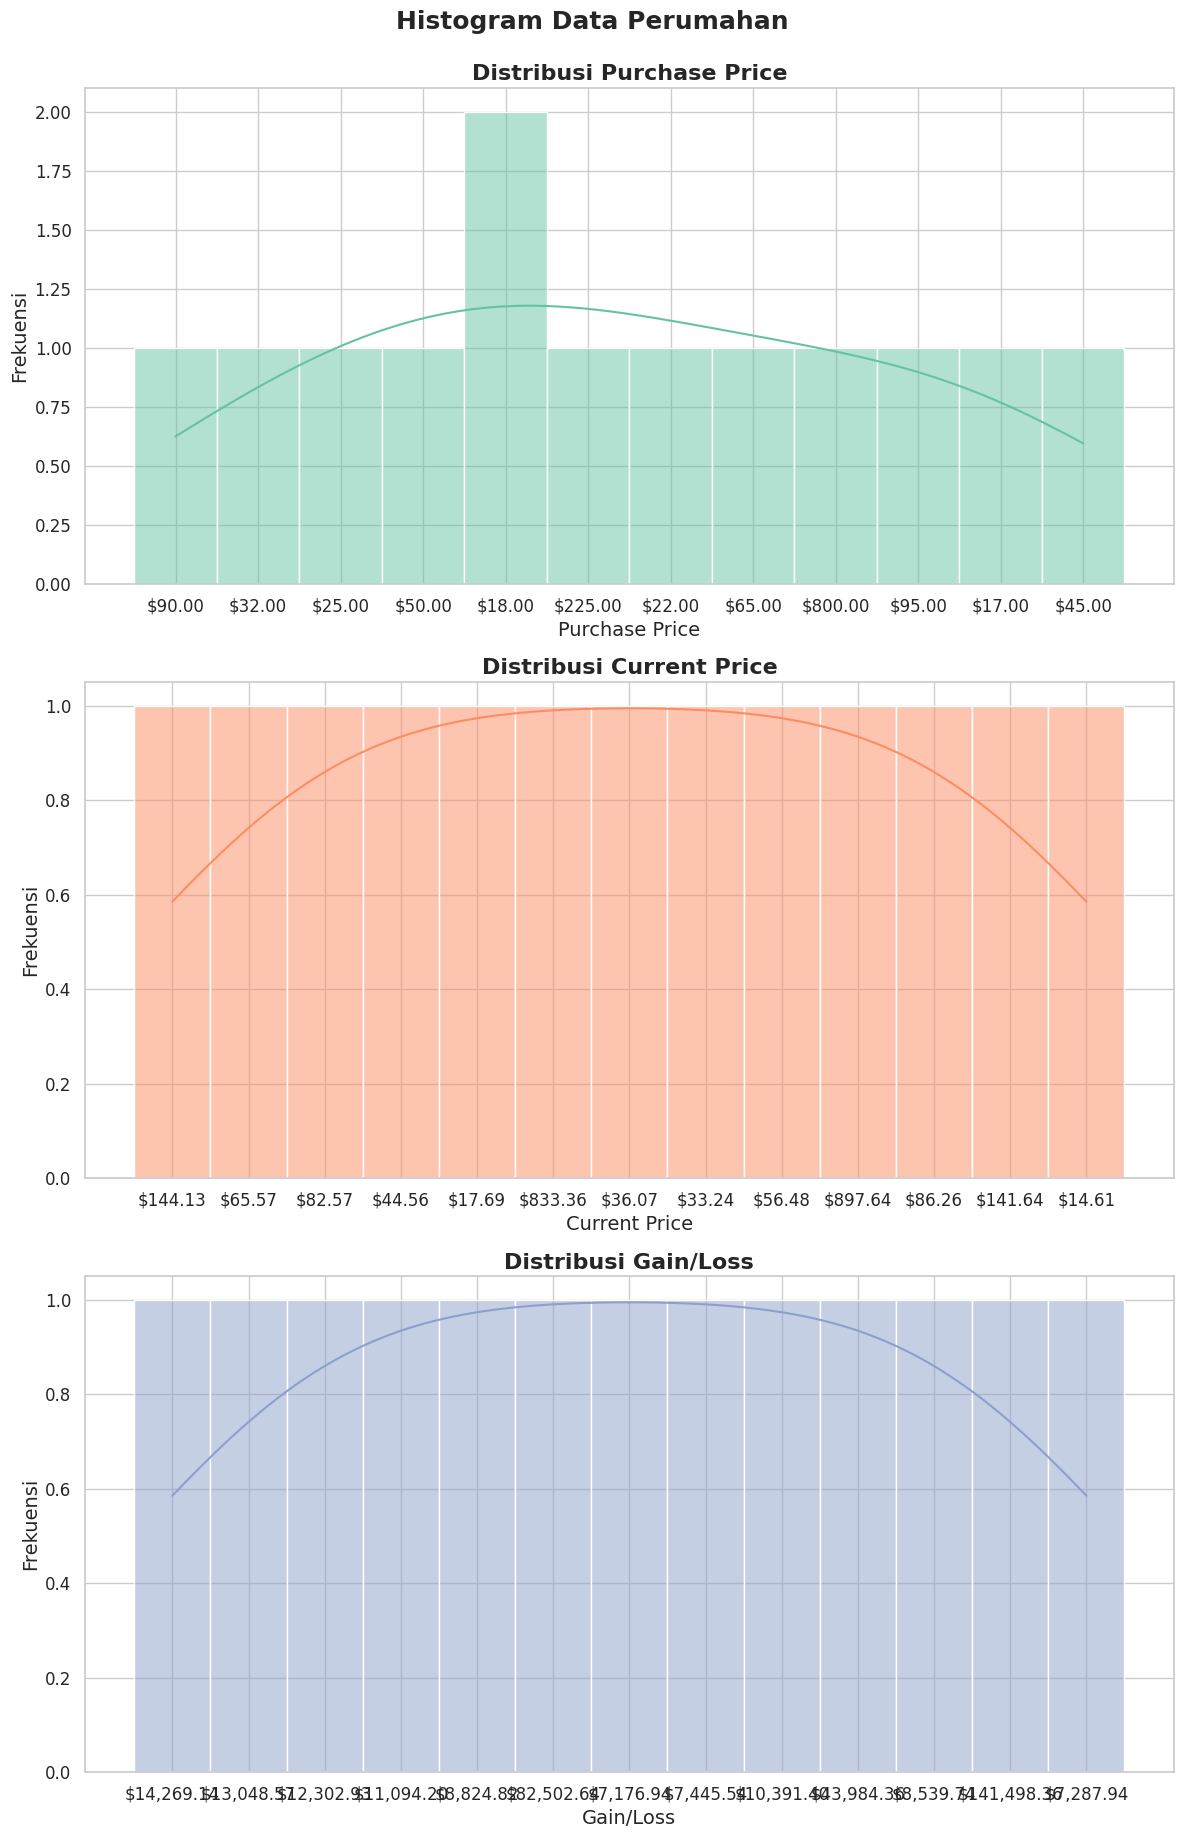

In [11]:
# Mengatur gaya untuk plot
sns.set(style="whitegrid")

# Membuat subplot
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Palet warna kustom
palette = sns.color_palette("Set2")

# Plot untuk Purchase Price
sns.histplot(data['Purchase Price'], bins=30, ax=axes[0], kde=True, color=palette[0])
axes[0].set_title('Distribusi Purchase Price', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Purchase Price', fontsize=14)
axes[0].set_ylabel('Frekuensi', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot untuk Current Price
sns.histplot(data['Current Price'], bins=30, ax=axes[1], kde=True, color=palette[1])
axes[1].set_title('Distribusi Current Price', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Current Price', fontsize=14)
axes[1].set_ylabel('Frekuensi', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Plot untuk Gain/Loss
sns.histplot(data['Gain/Loss'], bins=30, ax=axes[2], kde=True, color=palette[2])
axes[2].set_title('Distribusi Gain/Loss', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Gain/Loss', fontsize=14)
axes[2].set_ylabel('Frekuensi', fontsize=14)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)

# Menyesuaikan tata letak untuk jarak yang lebih baik
plt.tight_layout()

# Menambahkan judul keseluruhan
fig.suptitle('Histogram Data Perumahan', fontsize=18, fontweight='bold', y=1.02)

# Menampilkan plot
plt.show()

# Nomor **2B**

<ipython-input-12-9ae9b027fe70>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dividend/share', y='Stock Name', data=top_5_dividend, palette='coolwarm')


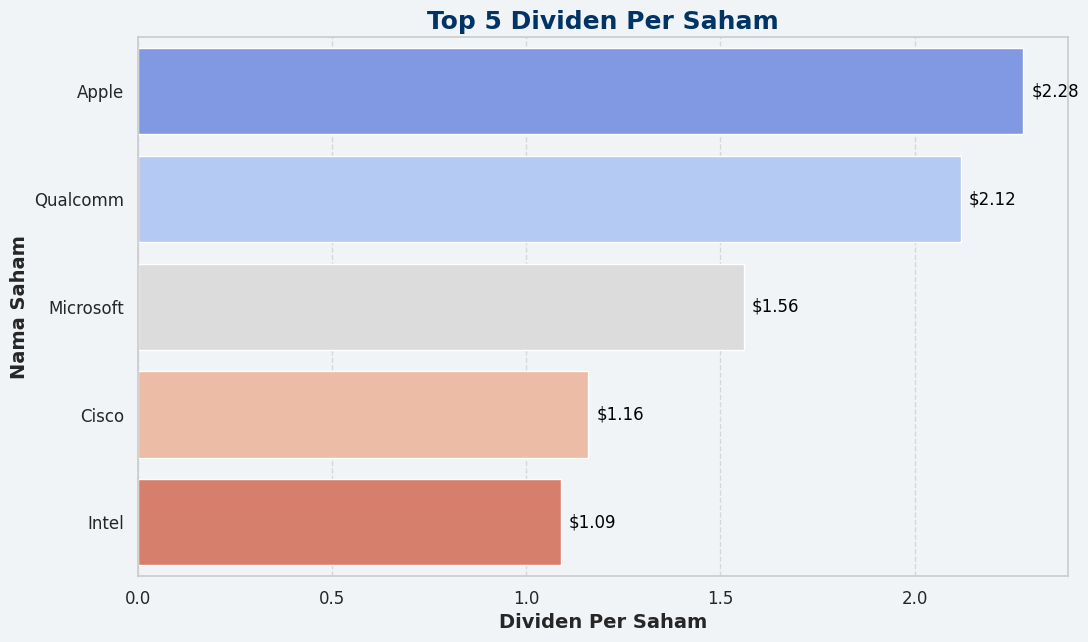

,Stock Name,Symbol,Dividend/share
0,Apple,AAPL,2.280000
8,Qualcomm,QCOM,2.120000
1,Microsoft,MSFT,1.560000
7,Cisco,CSCO,1.160000
6,Intel,INTC,1.090000


In [12]:
# Konversi kolom 'Dividend/share' menjadi float
data['Dividend/share'] = data['Dividend/share'].replace('[$,]', '', regex=True).astype(float)

# Dapatkan 5 saham dengan Dividen Per Saham tertinggi
top_5_dividend = data.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]

# Tampilkan diagram batang untuk 5 Saham dengan Dividen Per Saham tertinggi
plt.figure(figsize=(12, 7))
sns.barplot(x='Dividend/share', y='Stock Name', data=top_5_dividend, palette='coolwarm')

# Menambahkan anotasi
for index, value in enumerate(top_5_dividend['Dividend/share']):
    plt.text(value + 0.02, index, f"${value:.2f}", color='black', ha='left', va='center', fontsize=12)

plt.title('Top 5 Dividen Per Saham', fontsize=18, fontweight='bold', color='#003366')
plt.xlabel('Dividen Per Saham', fontsize=14, fontweight='bold')
plt.ylabel('Nama Saham', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menyesuaikan latar belakang plot
plt.gca().set_facecolor('#f0f4f7')
plt.gcf().set_facecolor('#f0f4f7')

plt.show()

# Tampilkan tabel untuk 5 Saham dengan Dividen Per Saham tertinggi
import pandas.io.formats.style

styled_table = top_5_dividend.style.set_properties(**{
    'background-color': '#f0f4f7',
    'color': 'black',
    'border-color': 'white',
    'border-style': 'solid',
    'border-width': '1px',
    'font-size': '14px',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#003366'), ('color', 'white'), ('font-size', '16px'), ('text-align', 'center')]}
]).highlight_max(color='lightgreen')

styled_table

# Nomor **2C**

<ipython-input-13-6a2b51ed154c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market Value', y='Stock Name', data=top_5_market_value, palette='viridis')


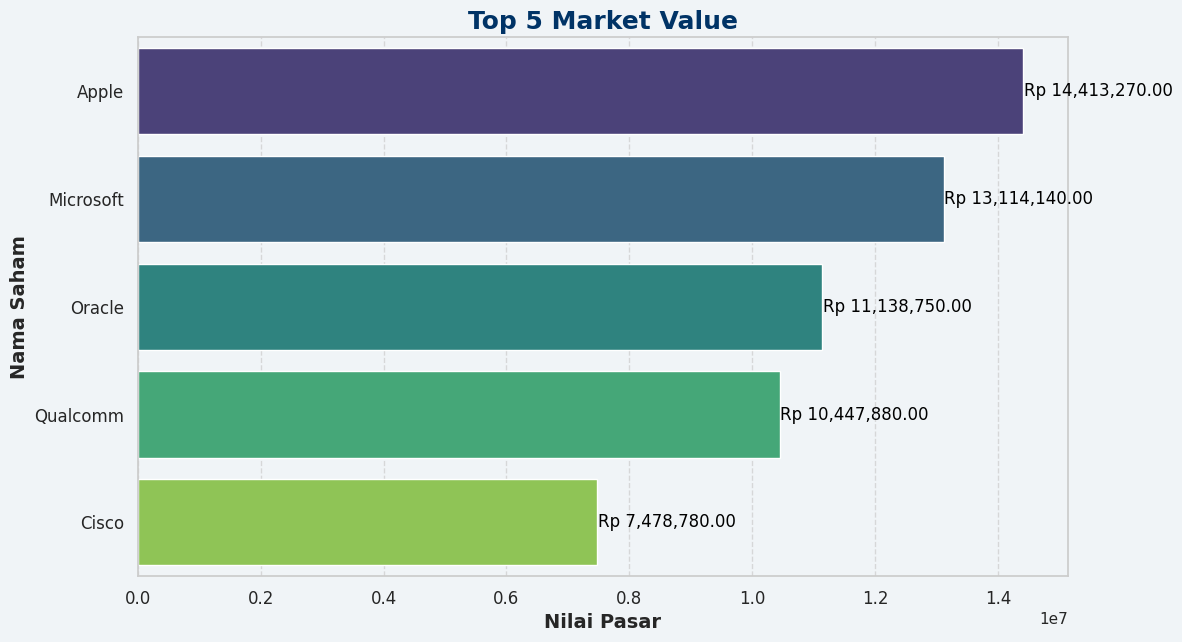

,Stock Name,Symbol,Market Value
0,Apple,AAPL,14413270.000000
1,Microsoft,MSFT,13114140.000000
3,Oracle,ORCL,11138750.000000
8,Qualcomm,QCOM,10447880.000000
7,Cisco,CSCO,7478780.000000


In [13]:
# Pastikan kolom 'Market Value' berisi nilai string
data['Market Value'] = data['Market Value'].astype(str)

# Bersihkan data dengan menghapus titik yang tidak sesuai dan mengganti koma dengan titik
data['Market Value'] = data['Market Value'].str.replace('.', '', regex=False).str.replace(',', '.')

# Konversi kolom 'Market Value' ke tipe data float
data['Market Value'] = data['Market Value'].replace('[$,]', '', regex=True).astype(float)

# Dapatkan 5 saham dengan Market Value tertinggi
top_5_market_value = data.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]

# Tampilkan bar plot untuk top 5 Market Value
plt.figure(figsize=(12, 7))
sns.barplot(x='Market Value', y='Stock Name', data=top_5_market_value, palette='viridis')

# Tambahkan anotasi
for index, value in enumerate(top_5_market_value['Market Value']):
    plt.text(value + 10000, index, f"Rp {value:,.2f}", color='black', ha='left', va='center', fontsize=12)

plt.title('Top 5 Market Value', fontsize=18, fontweight='bold', color='#003366')
plt.xlabel('Nilai Pasar', fontsize=14, fontweight='bold')
plt.ylabel('Nama Saham', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Sesuaikan latar belakang plot
plt.gca().set_facecolor('#f0f4f7')
plt.gcf().set_facecolor('#f0f4f7')

plt.show()

# Tampilkan tabel untuk top 5 Market Value
styled_table = top_5_market_value.style.set_properties(**{
    'background-color': '#f0f4f7',
    'color': 'black',
    'border-color': 'white',
    'border-style': 'solid',
    'border-width': '1px',
    'font-size': '14px',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#003366'), ('color', 'white'), ('font-size', '16px'), ('text-align', 'center')]}
]).highlight_max(color='lightgreen')

styled_table

# Nomor **2D**

<ipython-input-15-d2971225b518>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Annual Yield', y='Stock Name', data=top_7_annual_yield, palette='viridis')


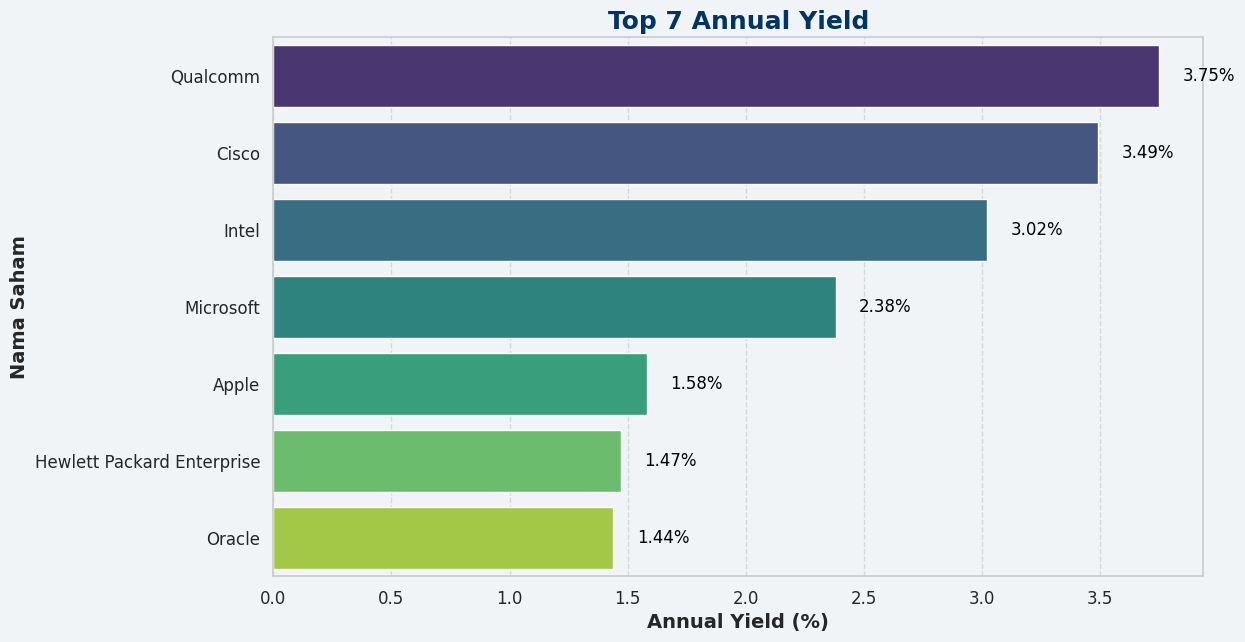

,Stock Name,Symbol,Annual Yield
8,Qualcomm,QCOM,3.750000
7,Cisco,CSCO,3.490000
6,Intel,INTC,3.020000
1,Microsoft,MSFT,2.380000
0,Apple,AAPL,1.580000
4,Hewlett Packard Enterprise,HPE,1.470000
3,Oracle,ORCL,1.440000


In [15]:
# Menghapus simbol persen dan mengonversi 'Annual Yield' menjadi float
data['Annual Yield'] = data['Annual Yield'].replace('[\%,]', '', regex=True).astype(float)

# Mengambil 7 saham dengan Annual Yield tertinggi
top_7_annual_yield = data.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]

# Menampilkan grafik batang untuk top 7 Annual Yield
plt.figure(figsize=(12, 7))
sns.barplot(x='Annual Yield', y='Stock Name', data=top_7_annual_yield, palette='viridis')

# Menambahkan anotasi
for index, value in enumerate(top_7_annual_yield['Annual Yield']):
    plt.text(value + 0.1, index, f"{value:.2f}%", color='black', ha='left', va='center', fontsize=12)

plt.title('Top 7 Annual Yield', fontsize=18, fontweight='bold', color='#003366')
plt.xlabel('Annual Yield (%)', fontsize=14, fontweight='bold')
plt.ylabel('Nama Saham', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menyesuaikan latar belakang plot
plt.gca().set_facecolor('#f0f4f7')
plt.gcf().set_facecolor('#f0f4f7')

plt.show()

# Menampilkan tabel untuk top 7 Annual Yield
styled_table = top_7_annual_yield.style.set_properties(**{
    'background-color': '#f0f4f7',
    'color': 'black',
    'border-color': 'white',
    'border-style': 'solid',
    'border-width': '1px',
    'font-size': '14px',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#003366'), ('color', 'white'), ('font-size', '16px'), ('text-align', 'center')]}
]).highlight_max(color='lightgreen')

styled_table